In [2]:
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import Layout
import json
import sys
import os
import subprocess

# Prompt Generation
Edit the File ``prompt_config.json`` to change the prompt generation parameters. The file contains the following parameters:


In [3]:
import src.genPrompt as genPrompt

def check_config(config_file):
    buttonRunGenPrompt.layout.border = '1px solid black'
    buttonCheckConfig.layout.border = '2px solid red'
    output.clear_output()
    with open(config_file) as f:
        config = json.load(f)
    with output:
        print(json.dumps(config, indent=4))

    # get count of prompts
    prompts = genPrompt.generate_prompts_from_json(config)
    promptCount = len(prompts)
    textPromptCount.value = str(promptCount)

def run_gen_prompt(config_file):
    output.clear_output()
    buttonRunGenPrompt.layout.border = '2px solid red'
    buttonCheckConfig.layout.border = '1px solid black'
    with output:
        # run genPrompt
        command = f"python ./src/genPrompt.py {config_file}"
        print(f"running: {command}")
        os.system(command)
        

textfield = widgets.Text(value='prompt_config.json', description='Config file:', disabled=False)

# check config button
buttonCheckConfig = widgets.Button(description="Check config")
buttonCheckConfig.on_click(lambda b: check_config(textfield.value))

# run button
buttonRunGenPrompt = widgets.Button(description="Run genPrompt")
buttonRunGenPrompt.on_click(lambda b: run_gen_prompt(textfield.value))

# prompt count
textPromptCountDesc = widgets.HTML(value="Prompt count (Images per Class):")
textPromptCount = widgets.HTML(value="0")
texPromptCountHbox = widgets.HBox([textPromptCountDesc, textPromptCount])

# output
heading = widgets.HTML(value="<h2>Output</h2>")
output = widgets.Output()
output.layout = {'border': '1px solid black'}

# run genPrompt container

buttonHbox = widgets.HBox([buttonCheckConfig, buttonRunGenPrompt])
display(textfield, buttonHbox, texPromptCountHbox, heading ,output)

Text(value='prompt_config.json', description='Config file:')

HTML(value='<h2>Output</h2>')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

# Dataset Generation

In [4]:
from IPython.display import display, HTML
import ipywidgets as widgets

checkboxStates = {
    'Generate Dataset': False,
    'Segmentation': False,
    'Dataset': False,
    'CNN Training': False
}
def on_run_button_clicked(b):
    # clear print output
    # print the selected values
    output.clear_output()
    with output:
        print("Selected values:")
        print(f"  Dataset Name: {datasetName.value}")
        print(f"  Prompt Config: {promptConfig.value}")
        print(f"  {checkboxStates}")

        # get checkbox values
        checkboxArguments = ""
        for key, value in checkboxStates.items():
            if key == 'Generate Dataset':
                if value:
                    checkboxArguments += "--generateDataset True "
                else:
                    checkboxArguments += "--generateDataset False "
            elif key == 'Segmentation':
                if value:
                    checkboxArguments += "--segmentateImages True "
                else:
                    checkboxArguments += "--segmentateImages False "
            elif key == 'prepare Trainings Dataset':
                if value:
                    checkboxArguments += "--createTrainingDataset True "
                else:
                    checkboxArguments += "--createTrainingDataset False "
        # run script
        command = f"start cmd /k python generateDataset.py --datasetName {datasetName.value} --promptConfig {promptConfig.value} {checkboxArguments}"
        print(f"\nExecuting command: {command}")
        os.system(command)

def on_checkbox_change(change):
    checkboxStates[change.owner.description] = change.new

# Create a text widget for datasetName
datasetName = widgets.Text(
    value='urinal_Dataset_v1',
    description='Dataset Name:',
    disabled=False,
    layout=Layout(width='auto')  # Set the width to 'auto'
)
# Create a text widget for promptConfig
promptConfig = widgets.Text(
    value='prompt_config.json',
    description='Prompt Config:',
    disabled=False,
    layout=Layout(width='auto')  # Set the width to 'auto'
)
# combine the two text widgets into a VBox
textWidgets = widgets.VBox([datasetName, promptConfig])

# select multiple values
checkboxGenerateDataset = widgets.Checkbox(value=False, description='Generate Dataset')
checkboxGenerateDataset.observe(on_checkbox_change, names='value')
checkboxSegmentation = widgets.Checkbox(value=False, description='Segmentation')
checkboxSegmentation.observe(on_checkbox_change, names='value')
checkboxDateset = widgets.Checkbox(value=False, description='prepare Trainings Dataset')
checkboxDateset.observe(on_checkbox_change, names='value')

checkboxCNNTraining = widgets.Checkbox(value=False, description='CNN Training', disabled=True)
checkboxCNNTraining.observe(on_checkbox_change, names='value')

checkboxes = widgets.VBox([checkboxGenerateDataset, checkboxSegmentation, checkboxDateset, checkboxCNNTraining])

# Create a button widget to run code
button = widgets.Button(description="Run", button_style='success')
button.on_click(on_run_button_clicked)

# combine the checkboxes and button into a HBox
hbox = widgets.HBox([textWidgets, checkboxes, button])


# create output widget
outputTitle = widgets.HTML(value="<h2>Output</h2>")
output = widgets.Output()
output.layout = {
    'border': '1px solid black',
    'overflow_y': 'auto',  # Add a vertical scrollbar in case of overflow
}
outputVbox = widgets.VBox([outputTitle, output])

display(hbox, outputVbox)


# CNN Model Training

In [5]:
import ipywidgets as widgets
from IPython.display import display
import subprocess

def get_datasets_from_folder(folder):
    return [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

def on_run_button_clicked(b):

    output.clear_output()
    
    # Get widget values
    dataset = dataset_widget.value
    model = model_widget.value
    model_selection = model_selection_widget.value
    if model_selection == 'fine-tuning':
        model_selection = '1'
    else:
        model_selection = '2'

    # run script
    with output:
        command = f"start cmd /k python ./src/trainCNN/trainCNN.py --dataset {dataset} --model {model} --modelSelection {model_selection}"
        print(f"\nExecuting command: {command}")
        os.system(command)

# Create widgets
#dataset_widget = widgets.Text(description='Dataset', value='urinal_v2')
dataset_widget = widgets.Dropdown(description='Dataset', options=get_datasets_from_folder('./datasets'))
model_widget = widgets.Dropdown(description='Model', options=['inception_v3', 'resnet50'])
model_selection_widget = widgets.Dropdown(description='Model Selection', options=['fine-tuning', 'feature-extraction'])

run_button = widgets.Button(description="Run", button_style='success')

outputTitle = widgets.HTML(value="<h2>Output</h2>")
output = widgets.Output()
output.layout = {
    'border': '1px solid black',
    'overflow_y': 'auto',  # Add a vertical scrollbar in case of overflow
}

# Display widgets
display(dataset_widget, model_widget, model_selection_widget, run_button, outputTitle, output)

run_button.on_click(on_run_button_clicked)



Dropdown(description='Dataset', options=('urinal_Dataset_v12', 'urinal_Dataset_v12_seg', 'urinal_Dataset_v13',…

Dropdown(description='Model', options=('inception_v3', 'resnet50'), value='inception_v3')

Dropdown(description='Model Selection', options=('fine-tuning', 'feature-extraction'), value='fine-tuning')

Button(button_style='success', description='Run', style=ButtonStyle())

HTML(value='<h2>Output</h2>')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

# Evaluation

In [56]:
# this script is for validating the trained CNN model

import ipywidgets as widgets
from IPython.display import display
import subprocess

def get_datasets_from_folder(folder):
    return [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

def on_run_button_clicked(b):
    output.clear_output()
    
    # Get widget values
    trainingFolder = trainingFolderWidget.value
    modelPath = os.path.join('./trainingOutput', trainingFolder, 'best_model.pth')

    # run script
    with output:
        command = f"start cmd /k python ./src/trainCNN/validateCNN.py --model_path {modelPath}"
        print(f"\nExecuting command: {command}")
        os.system(command)

# Create widgets
#dataset_widget = widgets.Text(description='Dataset', value='urinal_v2')
trainingFolderWidget = widgets.Dropdown(description='Trainings', options=get_datasets_from_folder('./trainingOutput'))

run_button = widgets.Button(description="Run", button_style='success')

outputTitle = widgets.HTML(value="<h2>Output</h2>")
output = widgets.Output()
output.layout = {
    'border': '1px solid black',
    'overflow_y': 'auto',  # Add a vertical scrollbar in case of overflow
}

# Display widgets
display(trainingFolderWidget, run_button, outputTitle, output)

run_button.on_click(on_run_button_clicked)



Dropdown(description='Trainings', options=('2024-05-03_11-24-09', '2024-05-04_14-43-26_urinal_v2_resnet50_fav'…

Button(button_style='success', description='Run', style=ButtonStyle())

HTML(value='<h2>Output</h2>')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

# Plotting


In [1]:
# this script is used to display the accuracy plot of a selected dataset
import ipywidgets as widgets
from IPython.display import display, HTML, Image
import os


global dataset_path

# dropdown on change function
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            output.clear_output()
            print(f"Selected dataset: {change['new']}")

        # display the selected dataset
        output_accuracy_plot(change['new'])

def output_accuracy_plot(dataset):
    global dataset_path
    output.clear_output()
    dataset_path = f"./trainingOutput/{dataset}"
    # display accuracy plot
    accuracy_plot = f"{dataset_path}/images-plots/plots/Accuracy_plot.png"
    # check if file exists, use output widget to display image
    if os.path.isfile(accuracy_plot):
        with output:
            display(Image(filename=accuracy_plot))
    else:
        with output:
            print(f"Accuracy plot not found: {accuracy_plot}")

def on_recreate_metrics_button_clicked(b):
    global dataset_path
    print("Recreating metrics")
    import src.trainCNN.tensorboardHandler as tbh
    tb = tbh.TensorBoard(os.path.join(dataset_path, 'tensorboard'))
    tb.plot_tensorboard_data()
    output_accuracy_plot(dropdown.value)

# get all folder in training folder and use them as options
def get_datasets_from_folder(folder):
    return [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))][::-1]

# ---- Widgets ----
# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=get_datasets_from_folder('./trainingOutput'),
    description='Training:',
    disabled=False,
)
dropdown.observe(on_change)

# Create a button widget to run code
button = widgets.Button(description="Run", button_style='success')

btn_recreateMetrics = widgets.Button(description="Recreate Metrics", button_style='success')
btn_recreateMetrics.on_click(on_recreate_metrics_button_clicked)

# Create an output widget
output = widgets.Output()
output.layout = {
    'border': '1px solid black',
    'overflow_y': 'auto',  # Add a vertical scrollbar in case of overflow
}
output_accuracy_plot(dropdown.value)


# display widgets
display(dropdown, btn_recreateMetrics, output)

Dropdown(description='Training:', options=('2024-06-07_23-59-29_urinal_Dataset_v15_seg_inception_v3_FT_finishe…

Button(button_style='success', description='Recreate Metrics', style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

Recreating metrics
init writer

Plots and images saved in ./trainingOutput/2024-06-07_23-59-29_urinal_Dataset_v15_seg_inception_v3_FT_finished_EP-19_ACC-0.9130_LOSS-0.2203\tensorboard\..\images-plots\plots and ./trainingOutput/2024-06-07_23-59-29_urinal_Dataset_v15_seg_inception_v3_FT_finished_EP-19_ACC-0.9130_LOSS-0.2203\tensorboard\..\images-plots\images


Recreating metrics
init writer

Plots and images saved in ./trainingOutput/2024-06-07_23-10-28_urinal_Dataset_v15_inception_v3_FT_finished_EP-26_ACC-0.9420_LOSS-0.1546\tensorboard\..\images-plots\plots and ./trainingOutput/2024-06-07_23-10-28_urinal_Dataset_v15_inception_v3_FT_finished_EP-26_ACC-0.9420_LOSS-0.1546\tensorboard\..\images-plots\images


Recreating metrics
init writer

Plots and images saved in ./trainingOutput/2024-06-07_21-40-04_urinal_Dataset_v14_seg_inception_v3_FT_finished_EP-42_ACC-0.9594_LOSS-0.0916\tensorboard\..\images-plots\plots and ./trainingOutput/2024-06-07_21-40-04_urinal_Dataset_v14_seg_inception_v3_FT_finished_EP-42_ACC-0.9594_LOSS-0.0916\tensorboard\..\images-plots\images


Recreating metrics
init writer

Plots and images saved in ./trainingOutput/2024-06-07_20-45-47_urinal_Dataset_v14_inception_v3_FT_finished_EP-20_ACC-0.9739_LOSS-0.0670\tensorboard\..\images-plots\plots and ./trainingOutput/2024-06-07_20-45-47_urinal_Dataset_v14_inception_v3_FT_finished_EP-20_ACC-0.9739_LOSS-0.0670\tensorboard\..\images-plots\images


Recreating metrics
init writer

Plots and images saved in ./trainingOutput/2024-06-07_19-07-24_urinal_Dataset_v13_seg_inception_v3_FT_finished_EP-26_ACC-0.9072_LOSS-0.2717\tensorboard\..\images-plots\plots and ./trainingOutput/2024-06-07_19-07-24_urinal_Dataset_v13_seg_inception_v3_FT_finished_EP-26_ACC-0.9072_LOSS-0.2717\tensorboard\..\images-plots\images


Recreating metrics
init writer

Plots and images saved in ./trainingOutput/2024-06-07_15-58-18_urinal_Dataset_v13_inception_v3_FT_finished_EP-32_ACC-0.9130_LOSS-0.1810\tensorboard\..\images-plots\plots and ./trainingOutput/2024-06-07_15-58-18_urinal_Dataset_v13_inception_v3_FT_finished_EP-32_ACC-0.9130_LOSS-0.1810\tensorboard\..\images-plots\images


Recreating metrics
init writer

Plots and images saved in ./trainingOutput/2024-06-07_14-54-02_urinal_Dataset_v12_seg_inception_v3_FT_finished_EP-22_ACC-0.9594_LOSS-0.0873\tensorboard\..\images-plots\plots and ./trainingOutput/2024-06-07_14-54-02_urinal_Dataset_v12_seg_inception_v3_FT_finished_EP-22_ACC-0.9594_LOSS-0.0873\tensorboard\..\images-plots\images


Recreating metrics
init writer

Plots and images saved in ./trainingOutput/2024-06-07_13-34-17_urinal_Dataset_v12_inception_v3_FT_finished_EP-18_ACC-0.9478_LOSS-0.1425\tensorboard\..\images-plots\plots and ./trainingOutput/2024-06-07_13-34-17_urinal_Dataset_v12_inception_v3_FT_finished_EP-18_ACC-0.9478_LOSS-0.1425\tensorboard\..\images-plots\images


# Testing

init writer
dict_keys(['Learning Rate', 'Accuracy_Test', 'Accuracy_Train', 'Loss_Test', 'Loss_Train', 'Precision_Test', 'Precision_Train', 'Recall_Test', 'Recall_Train'])


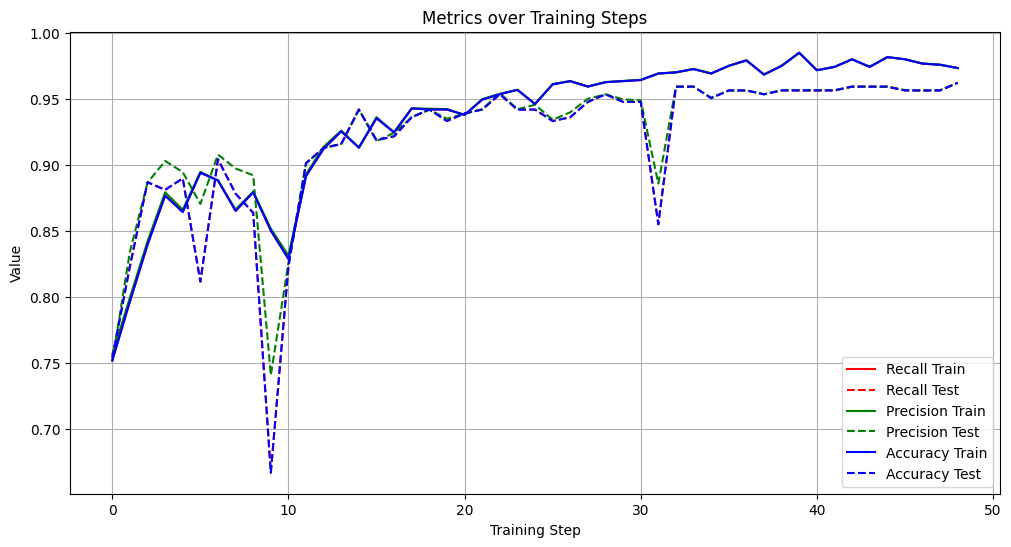

In [38]:
import src.trainCNN.tensorboardHandler as tbh

tbRoot = r"D:\code\Bachelorarbeit\xx_code_BA\trainingOutput\2024-06-07_21-40-04_urinal_Dataset_v14_seg_inception_v3_FT_finished_EP-42_ACC-0.9594_LOSS-0.0916"
tbh = tbh.TensorBoard(tbRoot)

metrics = tbh.extract_tensorboard_metrics()

print(metrics.keys())

accuracy_train = metrics['Accuracy_Train']
accuracyTest = metrics['Accuracy_Test']
precision_train = metrics['Precision_Train']
precision_test = metrics['Precision_Test']
recall_train = metrics['Recall_Train']
recall_test = metrics['Recall_Test']

#print(accuracy_train)
# combine all metrics into a single plot, use the same x-axis, different color for each metric, but same color for train and test
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(recall_train['Step'], recall_train['Value'], label='Recall Train', color='red')
plt.plot(recall_test['Step'], recall_test['Value'], label='Recall Test', color='red', linestyle='dashed')
plt.plot(precision_train['Step'], precision_train['Value'], label='Precision Train', color='green')
plt.plot(precision_test['Step'], precision_test['Value'], label='Precision Test', color='green', linestyle='dashed')
plt.plot(accuracy_train['Step'], accuracy_train['Value'], label='Accuracy Train', color='blue')
plt.plot(accuracyTest['Step'], accuracyTest['Value'], label='Accuracy Test', color='blue', linestyle='dashed')

plt.xlabel('Training Step')
plt.ylabel('Value')
plt.title('Metrics over Training Steps')
plt.grid()

plt.legend()

plt.show()


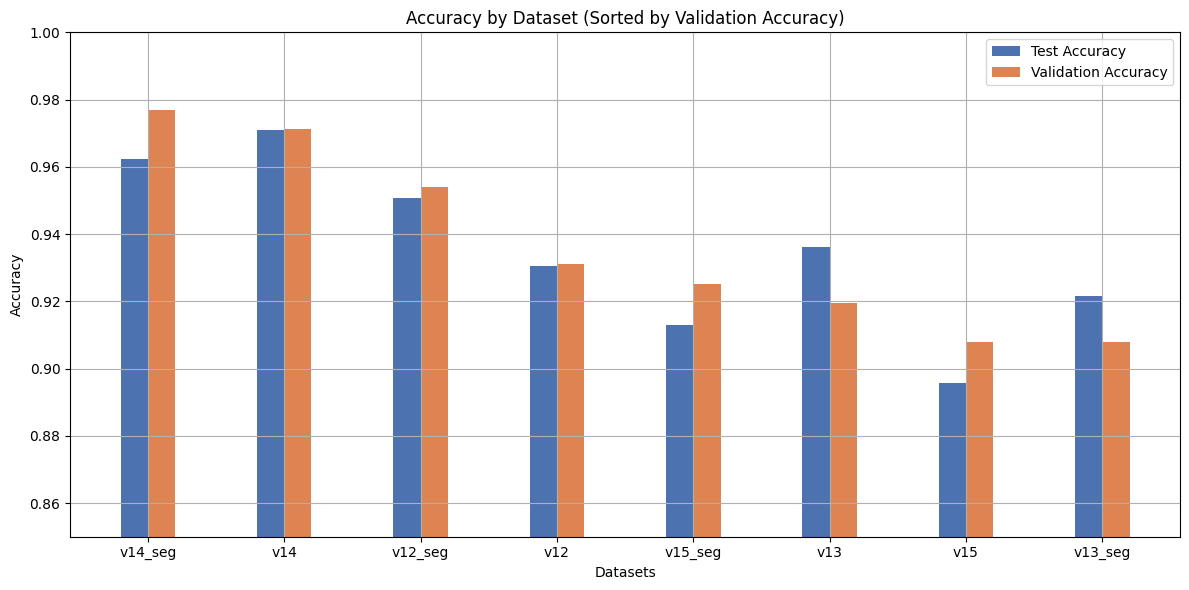

<Figure size 640x480 with 0 Axes>

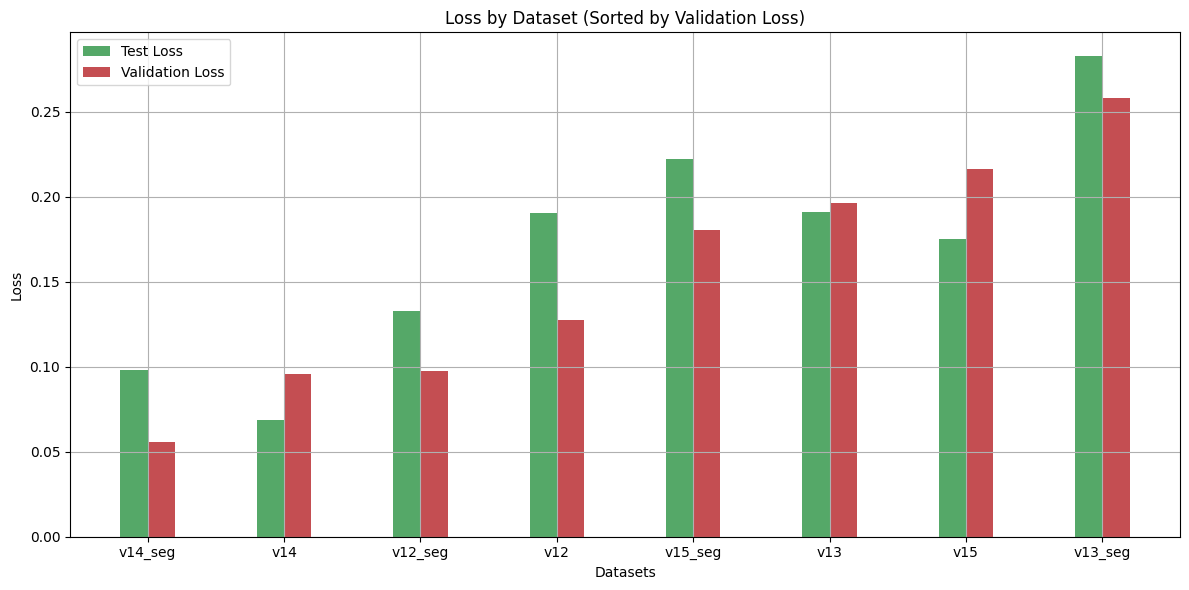

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Daten aus der Evaluation
datasets = ["v12", "v12_seg", "v13", "v13_seg", "v14", "v14_seg", "v15", "v15_seg"]
test_accuracy = [0.9304, 0.9507, 0.9217, 0.8957, 0.9710, 0.9623, 0.9362, 0.9130]
test_recall = [0.9304, 0.9507, 0.9217, 0.8957, 0.9710, 0.9623, 0.9362, 0.9130]
test_precision = [0.9300, 0.9520, 0.9293, 0.8961, 0.9711, 0.9624, 0.9363, 0.9127]
val_accuracy = [0.9310, 0.9540, 0.9080, 0.9080, 0.9713, 0.9770, 0.9195, 0.9253]
val_recall = [0.9310, 0.9540, 0.9080, 0.9080, 0.9713, 0.9770, 0.9195, 0.9253]
val_precision = [0.9305, 0.9538, 0.9091, 0.9091, 0.9735, 0.9770, 0.9352, 0.9317]
test_loss = [0.1903, 0.1326, 0.1908, 0.2825, 0.0687, 0.0983, 0.1752, 0.2222]
val_loss = [0.1272, 0.0973, 0.1964, 0.2579, 0.0956, 0.0556, 0.2161, 0.1801]

# Farben für die Balken
colors = {
    'soft_blue': '#4c72b0',
    'soft_orange': '#dd8452',
    'soft_green': '#55a868',
    'soft_red': '#c44e52',
    'soft_purple': '#8172b3',
    'soft_brown': '#937860',
    'soft_pink': '#da8bc3',
    'soft_gray': '#8c8c8c',
    'soft_yellow': '#ccb974',
    'soft_cyan': '#64b5cd'
}

# Sortieren nach Validation Accuracy
sorted_indices = np.argsort(val_accuracy)[::-1]  # Absteigend sortieren
sorted_datasets = [datasets[i] for i in sorted_indices]
sorted_test_accuracy = [test_accuracy[i] for i in sorted_indices]
sorted_val_accuracy = [val_accuracy[i] for i in sorted_indices]
sorted_test_recall = [test_recall[i] for i in sorted_indices]
sorted_val_recall = [val_recall[i] for i in sorted_indices]
sorted_test_precision = [test_precision[i] for i in sorted_indices]
sorted_val_precision = [val_precision[i] for i in sorted_indices]

# Sortieren nach Validation Loss
sorted_indices = np.argsort(val_loss)  # Aufsteigend sortieren
sorted_datasets = [datasets[i] for i in sorted_indices]
sorted_test_loss = [test_loss[i] for i in sorted_indices]
sorted_val_loss = [val_loss[i] for i in sorted_indices]

# prepare plot
x = np.arange(len(datasets))/2  # Label-Standorte
width = 0.1  # Breite der Balken

# Plot für Accuracy
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, sorted_test_accuracy, width, label='Test Accuracy', color=colors['soft_blue'])
rects2 = ax.bar(x + width/2, sorted_val_accuracy, width, label='Validation Accuracy', color=colors['soft_orange'])

# Labels und Titel für Accuracy
ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Dataset (Sorted by Validation Accuracy)')
ax.set_xticks(x)
ax.set_xticklabels(sorted_datasets)
ax.set_ylim(0.85, 1)
ax.legend()
ax.grid(True)
fig.tight_layout()
plt.show()
#plt.savefig('models_accuracy_sorted.pdf')

# Plot für Loss
fig, ax = plt.subplots(figsize=(12, 6))
rects3 = ax.bar(x - width/2, sorted_test_loss, width, label='Test Loss', color=colors['soft_green'])
rects4 = ax.bar(x + width/2, sorted_val_loss, width, label='Validation Loss', color=colors['soft_red'])

# Labels und Titel für Loss
ax.set_xlabel('Datasets')
ax.set_ylabel('Loss')
ax.set_title('Loss by Dataset (Sorted by Validation Loss)')
ax.set_xticks(x)
ax.set_xticklabels(sorted_datasets)
ax.legend()
ax.grid(True)

fig.tight_layout()
plt.show()
#plt.savefig('models_loss_sorted.pdf')


In [35]:
import torch
from torchvision import models, transforms
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import os
import io

class_names = ['clean', 'avgDirty', 'dirty']
global img, modelPath

def use_model(model, device, img):
    model = model.to(device)
    model.eval()   # set model to evaluation mode

    with torch.no_grad():   # no need to track gradients for validation
        imgs = img.to(device)   # move data to device

        # -- forward pass --
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)

        return preds

def run():
    global img, modelPath
    # --- Prepare Model ---
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model_ft = models.inception_v3(pretrained=True)
    num_ftrs = model_ft.fc.in_features
    model_ft.fc = torch.nn.Linear(num_ftrs, 3)
    model_ft.to(device)
    model = model_ft
    model.load_state_dict(torch.load(modelPath))

    # --- Prepare Image ---
    transform = transforms.Compose([
        transforms.Resize(512),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = transform(img)
    img = img.unsqueeze(0)  # add batch dimension

    pred = use_model(model, device, img)
    print(f"Prediction: {class_names[pred.item()]}")

# Function to handle file selection
def on_file_select(change):
    global img

    file_info = change['new'][0]  # Extract the file info dictionary from the tuple
    file_content = file_info['content']  # Access the file content

    # Convert the file content to an image
    image = Image.open(io.BytesIO(file_content))
    img = image
    print("Image loaded")

    output.clear_output()
    displayImage = widgets.Image(value=file_content, format='jpg', width=512, height=512)
    with output:
        display(displayImage)

def get_datasets_from_folder(folder):
    return [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

def on_run_button_clicked(b):
    global modelPath

    output.clear_output()
    
    # Get widget values
    trainingFolder = trainingFolderWidget.value
    modelPath = os.path.join('./trainingOutput', trainingFolder, 'best_model.pth')
    run()


# Create file picker widget
file_picker = widgets.FileUpload(
    accept='',  # Accept all file types
    multiple=False,  # Only single file upload
    description='Select Image',

)
# pick model
trainingFolderWidget = widgets.Dropdown(description='Trainings', options=get_datasets_from_folder('./trainingOutput'))

run_button = widgets.Button(description="Run", button_style='success')
run_button.on_click(on_run_button_clicked)

outputTitle = widgets.HTML(value="<h2>Output</h2>")
output = widgets.Output()
output.layout = {
    'border': '1px solid black',
    'overflow_y': 'auto',  # Add a vertical scrollbar in case of overflow
}

# Display widgets
display(file_picker, trainingFolderWidget, run_button, outputTitle, output)

# Observe changes in the file picker
file_picker.observe(on_file_select, names='value')






FileUpload(value=(), description='Select Image')

Dropdown(description='Trainings', options=('2024-05-03_11-24-09', '2024-05-04_14-43-26_urinal_v2_resnet50_fav'…

Button(button_style='success', description='Run', style=ButtonStyle())

HTML(value='<h2>Output</h2>')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

Image loaded


c:\Users\Martin\miniconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Martin\miniconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Prediction: avgDirty
